In [ ]:
import os
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
%matplotlib inline 
import logging


In [104]:
FORMAT = '%(asctime)-15s %(levelname)s %(name)s : %(message)s'
logging.basicConfig(level=logging.DEBUG, format=FORMAT, stream=sys.stdout )
logging.debug("Logging enabled")
ROOT_DIR = os.path.abspath("../../../")
sys.path.append(ROOT_DIR)
HUMAN_DIR = os.path.abspath("../")
sys.path.append(HUMAN_DIR)
sys.path.append(os.path.join(ROOT_DIR, "opendr"))
MODEL_DIR = os.path.abspath(os.path.join(ROOT_DIR, "../Models"))
DATA_DIR  = os.path.abspath(os.path.join(ROOT_DIR, "../Data"))
COCO_DIR  = os.path.abspath(os.path.join(DATA_DIR, "coco"))
OCCLUDE_DIR  = os.path.abspath(os.path.join(DATA_DIR, "VOCdevkit/VOC2012"))
import tf_smpl.batch_smpl as batch_smpl
import tf_smpl.projection as tf_projection
from smpl.renderer import *


2018-11-13 11:13:30,550 DEBUG root : Logging enabled


In [105]:
smpl = batch_smpl.SMPL(os.path.join(DATA_DIR, "smpl-models", "model_neutral_np.pkl"))
renderer = SMPLRenderer(face_path=os.path.join(ROOT_DIR, "tf_smpl", "smpl_faces.npy"))

In [106]:
sess = tf.Session()
pos = np.zeros((1,10), dtype='float32')
ang = np.zeros((1,72), dtype='float32')
pos[0,4] = 1.0
ang[0,10] = 20.0
verts, joints, Rs = smpl(pos, ang, get_skin=True)
sess = tf.Session()
verts, joints, Rs = sess.run([verts, joints, Rs])
sess.close()

In [260]:
offset_val = 4
offset = [0,0,offset_val]
pos = np.zeros((1,10), dtype='float32')
ang = np.zeros((1,72), dtype='float32')
pos[0,4] = 0.0
ang[0,10] = 1.0
verts, joints, Rs = smpl(pos, ang, get_skin=True)
#tf_cam = tf.convert_to_tensor([cam])
#p_joints = tf_projection.batch_orth_proj_idrot(joints + offset, tf_cam)
sess = tf.Session()
verts, joints, Rs = sess.run([verts, joints, Rs])
sess.close()

The `image_size` below makes no difference to the rendered image. So the vertices are effectively scaled to the image size

2018-11-13 13:26:47,943 INFO opendr.lighting : LambertianPointLight using auto-normals. This will be slow for derivative-free computations.
2018-11-13 13:26:47,953 INFO opendr.lighting : LambertianPointLight using auto-normals. This will be slow for derivative-free computations.
2018-11-13 13:26:47,964 INFO opendr.lighting : LambertianPointLight using auto-normals. This will be slow for derivative-free computations.


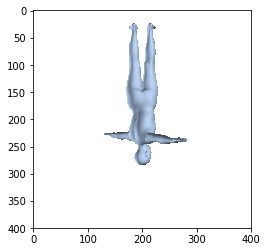

In [261]:
image_size = 400
cam = [1.5*image_size, image_size/2, image_size/2]
r_verts = renderer(verts[0,:,:] + offset,do_alpha=True, cam=cam, img_size=[image_size,image_size])
plt.imshow(r_verts)

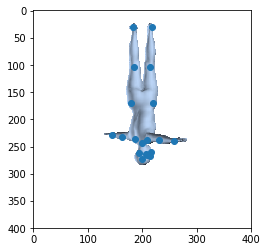

In [276]:
import cv2
cameraMatrix = np.array([[cam[0],0,cam[1]],[0,cam[0],cam[2]],[0,0,1]])
rvec = np.array([0,0,0], np.float) # rotation vector
tvec = np.array([0,0,0], np.float) # translation vector
r_verts2,_ = cv2.projectPoints(joints[0,:,:] + offset, rvec, tvec, cameraMatrix, None)
plt.scatter(r_verts2[:,0,0],r_verts2[:,0,1])
plt.imshow(r_verts)


https://en.wikipedia.org/wiki/3D_projection

formula for 3d projection



array([[-1.15119956e-01, -1.11560500e+00,  3.95810295e+00],
       [-9.86113548e-02, -6.50696993e-01,  4.03326867e+00],
       [-1.34750873e-01, -2.01044649e-01,  4.03973653e+00],
       [ 1.33026466e-01, -2.00860709e-01,  4.03343719e+00],
       [ 9.58140492e-02, -6.51474357e-01,  4.03842884e+00],
       [ 1.13484249e-01, -1.11643314e+00,  3.95766565e+00],
       [-4.17657763e-01,  2.18479991e-01,  4.55453551e+00],
       [-2.70722508e-01,  2.27642000e-01,  4.32616997e+00],
       [-9.18335468e-02,  2.46046901e-01,  4.10214136e+00],
       [ 5.91492280e-02,  2.48013824e-01,  3.86988187e+00],
       [ 1.86706498e-01,  2.27898017e-01,  3.61832684e+00],
       [ 3.32505167e-01,  2.20434502e-01,  3.38899308e+00],
       [-4.28962335e-03,  2.87273020e-01,  3.99429693e+00],
       [-1.59349747e-03,  4.91487056e-01,  3.99812335e+00],
       [ 1.12364456e-01,  4.12450135e-01,  4.07007995e+00],
       [ 9.84206125e-02,  4.47817653e-01,  4.02174813e+00],
       [ 6.12884127e-02,  4.47106242e-01

(0.49148706, 0.4591605)

array([[[ 0.57732004, -0.9234075 ],
        [ 0.60208297, -0.22604549],
        [ 0.5478737 ,  0.44843304],
        [ 0.9495397 ,  0.44870895],
        [ 0.8937211 , -0.22721153],
        [ 0.9202264 , -0.9246497 ],
        [ 0.12351336,  1.0777199 ],
        [ 0.34391624,  1.091463  ],
        [ 0.61224973,  1.1190703 ],
        [ 0.8387238 ,  1.1220207 ],
        [ 1.0300597 ,  1.091847  ],
        [ 1.2487577 ,  1.0806518 ],
        [ 0.74356556,  1.1809096 ],
        [ 0.74760973,  1.4872305 ],
        [ 0.9185467 ,  1.3686752 ],
        [ 0.89763093,  1.4217265 ],
        [ 0.84193265,  1.4206593 ],
        [ 0.8148893 ,  1.3816981 ],
        [ 0.6932076 ,  1.3778862 ]]], dtype=float32)

2018-11-13 10:27:57,313 INFO opendr.lighting : LambertianPointLight using auto-normals. This will be slow for derivative-free computations.
2018-11-13 10:27:57,323 INFO opendr.lighting : LambertianPointLight using auto-normals. This will be slow for derivative-free computations.
2018-11-13 10:27:57,333 INFO opendr.lighting : LambertianPointLight using auto-normals. This will be slow for derivative-free computations.


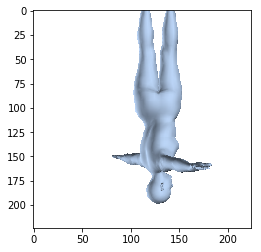

255

0.79951596